## 聚类分析和k均值聚类算法
`聚类分析`(`cluster analysis`)是一类经典的无监督学习算法，在给定样本的情况下，聚类分析通过度量`特征相似度`或者`距离`，将样本自动划分为若干类别。

### 1 距离度量和相似度度量方式
距离度量和相似度度量是聚类分析的核心概念，大多数聚类算法建立在距离度量之上。常用的距离度量方式包括`闵氏距离`和`马氏距离`，常用的相似度度量方式包括`相关系数`和`夹角余弦`等。   

(1) `闵氏距离`即`闵可夫斯基距离`(`Minkowski distance`)，该距离定义如下，给定`m`维向量样本集合`X`，对于`xi`，`xj`∈`X`，`xi`=`(x1i,x2i,...xmi)T`，那么样本xi与样本xj的闵氏距离可定义为：
$$ d_{ij}=\left ( \sum_{k=1}^{m}\left | x_{ki}-x_{kj}   \right | ^{p}   \right )^{\frac{1}{p} }, p\ge 1 $$
可以简单看出，当`p=1`时，`闵氏距离`就变成了`曼哈顿距离`(`Manhatan distance`)：
$$ d_{ij}=\sum_{k=1}^{m}\left | x_{ki}-x_{kj}   \right | $$
当`p=2`时，`闵氏距离`就变成了`欧氏距离`(`Euclidean distance`)：
$$ d_{ij}=\left ( \sum_{k=1}^{m}\left | x_{ki}-x_{kj}   \right | ^{2}   \right )^{\frac{1}{2} } $$
当`p=∞`时，`闵氏距离`也称`切比雪夫距离`(`Chebyshev distance`)：
$$ d_{ij}=max\left | x_{ki}-x_{kj}   \right |   $$
(2) `马氏距离`全称`马哈拉诺比斯距离`(`Mahalanobis distance`)，是一种衡量各个特征之间相关性的聚类度量方式。给定一个样本集合`X=(xij)mxn`，假设样本的协方差矩阵为`S`，那么样本xi与样本xj之间的马氏距离可以定义为：
$$ d_{ij}=\left [\left(x_{i}-x_{j}\right)^{T} S^{-1}\left(x_{i}-x_{j}\right)\right] ^{\frac{1}{2}} $$
当`S`为单位矩阵，即样本的各特征之间相互独立且方差为1时，马氏距离就是欧氏距离。

(3) 相关系数(correlation coefficent)是度量样本相似度最常用的方式。相关系数有多种定义方式，较为常用的是皮尔逊相关系。相关系数越接近1，两个样本越相似；样本xi与样本xj之间的相关系数可定义为：
$$ r_{ij}=\frac{\sum_{k=1}^{m}\left ( x_{ki}-\bar{x}_{i}\right )\left ( x_{kj}-\bar{x}_{j}\right )}{\left [ \sum_{k=1}^{m} \left ( x_{ki}-\bar{x}_{i}\right )^{2} \sum_{k=1}^{m} \left ( x_{kj}-\bar{x}_{j}\right )^{2} \right ] ^{\frac{1}{2} } }  $$
上边这个式子看起来有点复杂，其实就是：
$$   r\left ( X,Y \right ) =\frac{Cov\left ( X,Y \right ) }{\sqrt{Var\left [ X \right ] Var\left [ Y \right ] } } $$
(4) `余弦夹角`(`angle cosine`)也是度量两个样本相似度的方式。夹角余弦越接近1，表示两个样本越相似:
$$ similarity=cos\left ( \theta  \right ) =\frac{A\cdot B}{\left\|A\right\|\left\|B\right\|} $$ 
样本xi与样本xj之间的夹角余弦可定义为：
$$ AC_{ij}=\frac{\sum_{k=1}^{m}x_{ki}x_{kj}}{\left [ \sum_{k=1}^{m}x_{ki}^{2} \sum_{k=1}^{m}x_{kj}^{2}\right ] ^{\frac{1}{2}}}  $$

### 2 聚类算法一览
聚类算法将相似的样本归入同一个簇(cluster)中，这使得同一个簇中的样本对象的相似度尽可能大，同时不同簇中的样本对象的差异性也尽可能大。常用的聚类算法有如下几种：
- `基于距离的聚类`:该类算法的目标是使簇内距离小、簇间距离大，最典型的就是`k均值聚类`算法。
- `基于密度的聚类`:该类算法是根据样本邻近区域的密度来进行划分的，最常见的密度聚类算法当属`DBSCAN算法`。
- `层次聚类算法`:包括合并层次聚类和分裂层次聚类等。
- 基于图论的`谱聚类`。

### 3 K-means算法实现

In [1]:
import numpy as np

# 定义欧氏距离
def euclidean_distance(x, y):
    
    distance = 0
    for i in range(len(x)):
        distance += np.power((x[i] - y[i]), 2)
    return np.sqrt(distance)

In [2]:
# 质心初始化
def centroids_init(X, k): # 训练样本,质心个数(聚类簇数）

    m, n = X.shape # 样本数和特征数
    centroids = np.zeros((k, n)) # 初始化质心矩阵，大小为质心个数*特征数
    for i in range(k):
        centroid = X[np.random.choice(range(m))]
        centroids[i] = centroid
    return centroids # centroids：质心矩阵,k个长度为n的从m个样本中选取的样本

In [8]:
# 定义样本所属最近质心的索引
def closest_centroid(x, centroids): # 单个样本实例，质心矩阵

    closest_i, closest_dist = 0, float('inf')
    for i, centroid in enumerate(centroids):
        distance = euclidean_distance(x, centroid)
        if distance < closest_dist:
            closest_i = i
            closest_dist = distance
    return closest_i # closest_i：最近质心

In [3]:
# 分配样本与构建簇
def build_clusters(centroids, k, X): # 质心矩阵,质心个数, 训练样本

    clusters = [[] for _ in range(k)] # 初始化簇列表
    for x_i, x in enumerate(X):
        centroid_i = closest_centroid(x, centroids) # 样本最近质心的下标
        clusters[centroid_i].append(x_i) # 样本下标加入簇矩阵中
    return clusters # 聚类簇

In [4]:
# 计算新的质心
def calculate_centroids(clusters, k, X):

    n = X.shape[1] # 特征数
    centroids = np.zeros((k, n)) # 初始化质心矩阵
    for i, cluster in enumerate(clusters):
        centroid = np.mean(X[cluster], axis=0) # 计算每个簇的均值作为新的质心
        centroids[i] = centroid # 更新质心矩阵
    return centroids # 返回新的质心矩阵

In [5]:
# 获取每个样本所属聚类类别
def get_cluster_labels(clusters, X):

    y_pred = np.zeros(X.shape[0]) # 样本数
    for cluster_i, cluster in enumerate(clusters):
        for sample_i in cluster:
            y_pred[sample_i] = cluster_i
    return y_pred # 预测结果

In [59]:
from matplotlib import pyplot as plt

# 封装k-means算法
def kmeans(X, k, max_iterations):

    centroids = centroids_init(X, k) # 训练样本,质心个数(聚类簇数）

    # 迭代至收敛
    for _ in range(max_iterations):
        clusters = build_clusters(centroids, k, X) # 分配样本与构建簇
        new_centroids = calculate_centroids(clusters, k, X) # 计算新的质心
        print(f'迭代进行到第{_}轮')
        diff = centroids - new_centroids
        centroids = new_centroids
        if not diff.any():
            break
    return get_cluster_labels(clusters, X) # 获取每个样本所属聚类类别

迭代进行到第0轮
迭代进行到第1轮
迭代进行到第2轮


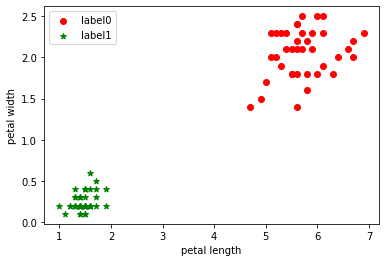

In [97]:
from sklearn import datasets

# 测试算法
data = datasets.load_iris()
iris, y = data.data, data.target
label_pred = kmeans(iris, 3, 100)

# 取2个或者3个维度来看一下聚类的效果
X = iris[:,2:]
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()

### 3 基于sklearn的K-means算法

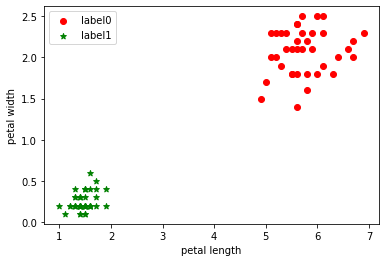

In [96]:
from sklearn.cluster import KMeans

kmeans_sk = KMeans(n_clusters=3, random_state=2023).fit(iris)
label_pred = kmeans_sk.labels_ # 打印拟合标签

X = iris[:,2:]
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
plt.scatter(x0[:, 0], x0[:, 1], c = "red", marker='o', label='label0')
plt.scatter(x1[:, 0], x1[:, 1], c = "green", marker='*', label='label1')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc=2)
plt.show()